In [5]:
from keras.datasets import mnist
from keras import models, layers, regularizers
from keras.layers import Input, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Carregando os dados
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessamento dos dados
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def create_model(dropout_rate=0.0, l2_rate=0.0):
    model = models.Sequential()
    model.add(Input(shape=(28 * 28,)))
    if l2_rate > 0:
        model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)))
    else:
        model.add(layers.Dense(512, activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
def compare_models():
    results = {}

    # Modelo base
    base_model = create_model()
    base_history = base_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1, verbose=0)
    base_acc = base_model.evaluate(test_images, test_labels, verbose=0)[1]
    results['Base'] = base_acc

    # Modelo com Dropout
    dropout_model = create_model(dropout_rate=0.5)
    dropout_history = dropout_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1, verbose=0)
    dropout_acc = dropout_model.evaluate(test_images, test_labels, verbose=0)[1]
    results['Dropout'] = dropout_acc

    # Modelo com Regularização L2
    l2_model = create_model(l2_rate=0.001)
    l2_history = l2_model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1, verbose=0)
    l2_acc = l2_model.evaluate(test_images, test_labels, verbose=0)[1]
    results['L2'] = l2_acc

    # Modelo com Early Stopping
    early_stopping_model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=2)
    es_history = early_stopping_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=0)
    es_acc = early_stopping_model.evaluate(test_images, test_labels, verbose=0)[1]
    results['EarlyStopping'] = es_acc

    # Imprimindo os resultados
    for technique, acc in results.items():
        print(f"{technique} Accuracy: {acc}")

    # Opicional: Retorne os históricos para análise posterior
    return base_history, dropout_history, l2_history, es_history

# Chame a função para comparar os modelos
base_history, dropout_history, l2_history, es_history = compare_models()

Base Accuracy: 0.9803000092506409
Dropout Accuracy: 0.9778000116348267
L2 Accuracy: 0.9725000262260437
EarlyStopping Accuracy: 0.9771999716758728


In [14]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, title: str = 'Learning Curves'):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    plt.figure(figsize=(12, 5))
    # Adiciona um título
    plt.suptitle(title)
    plt.suptitle(history.history)
    
    # Plota a perda de treinamento e validação
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plota a acurácia de treinamento e validação
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

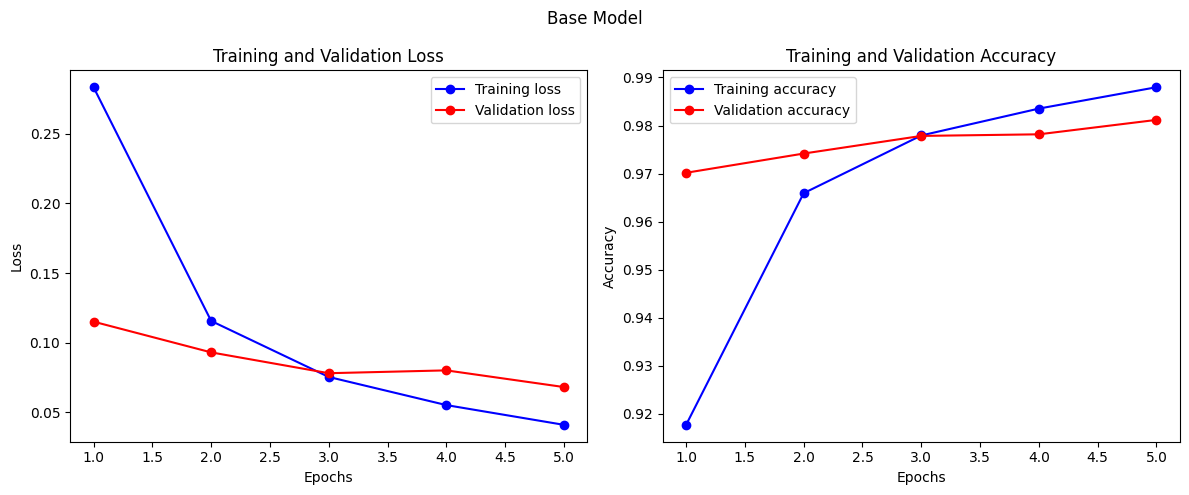

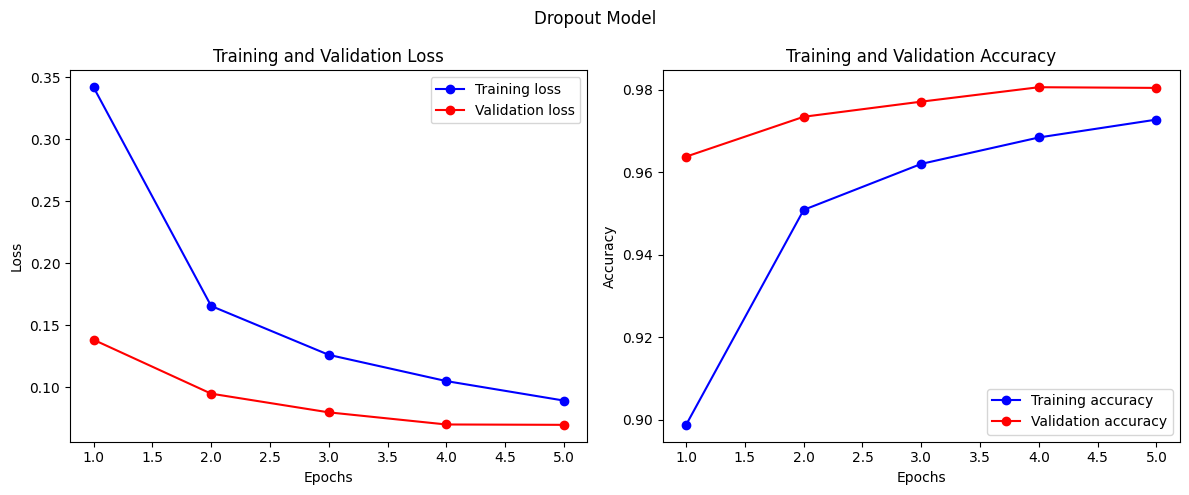

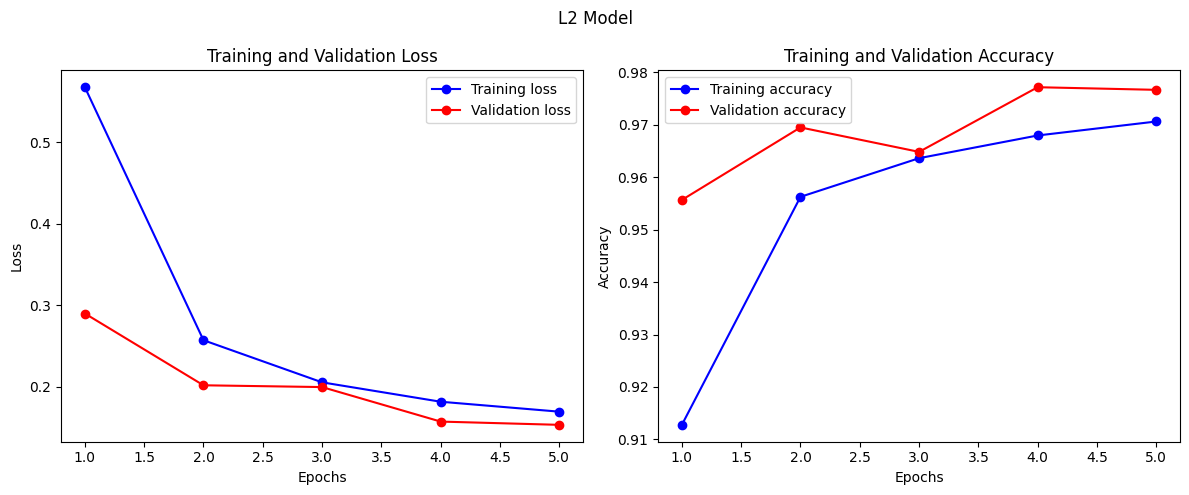

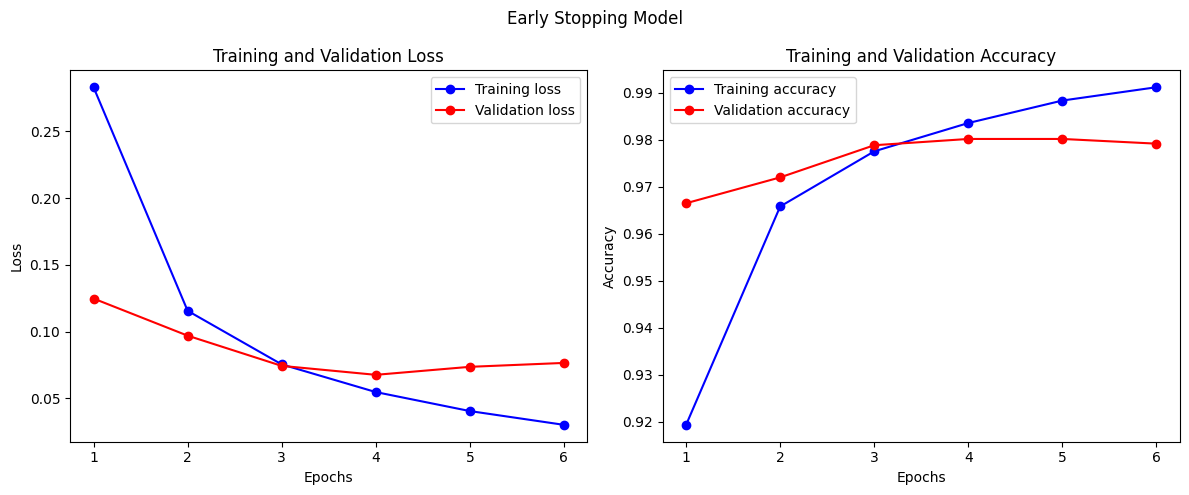

In [15]:
# Plote as curvas de aprendizado
plot_learning_curves(base_history, title='Base Model')
plot_learning_curves(dropout_history, title='Dropout Model')
plot_learning_curves(l2_history, title='L2 Model')
plot_learning_curves(es_history, title='Early Stopping Model')